<a href="https://colab.research.google.com/github/jvieirax/Brent_Crude_Oil/blob/main/Brent_Crude_Oil_one_feature2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Importando a Lib do Yahoo Finance
import yfinance as yf

In [6]:
from datetime import date

today = date.today()


d1 = today.strftime("%d/%m/%Y")
print("d1 =", d1)

d = today.strftime("%Y-%m-%d")
print("d =", d)

# Textual month, day and year
d2 = today.strftime("%B %d, %Y")
print("d2 =", d2)

# mm/dd/y
d3 = today.strftime("%m/%d/%y")
print("d3 =", d3)

# Month abbreviation, day and year
d4 = today.strftime("%b-%d-%Y")
print("d4 =", d4)

d1 = 01/05/2024
d = 2024-05-01
d2 = May 01, 2024
d3 = 05/01/24
d4 = May-01-2024


In [7]:
# Symbol da Petroleo Brent e o intervalo de tempo
symbol = 'BZ=F'
start_date = '2023-04-28'
end_date = '2024-04-28'

# Download do yf
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-28,78.309998,79.599998,77.970001,79.540001,79.540001,26788
2023-05-01,80.180000,80.190002,78.129997,79.309998,79.309998,12551
2023-05-02,79.260002,79.779999,75.089996,75.320000,75.320000,35700
2023-05-03,75.269997,75.550003,71.680000,72.330002,72.330002,34878
2023-05-04,71.889999,73.730003,68.199997,72.500000,72.500000,30132


In [9]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,82.548651,83.644643,81.462223,82.579286,82.579286,28622.694444
std,5.693843,5.627992,5.778853,5.714427,5.714427,9165.222387
min,71.889999,73.730003,68.199997,71.839996,71.839996,6015.000000
25%,77.860001,79.070000,76.642502,77.832499,77.832499,22784.750000
50%,82.395000,83.244999,81.430000,82.459999,82.459999,28802.500000
75%,86.557499,87.520002,85.795000,86.819998,86.819998,34359.750000
max,96.620003,97.629997,94.959999,96.550003,96.550003,59320.000000


In [10]:
# Bibliotecas básicas de data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

# Para baixar os dados
import yfinance as yf


#Para aplicar o ARIMA:
from statsmodels.tsa.stattools import adfuller          #verificar dados estacionários
from statsmodels.tsa.stattools import acf, pacf         #correlação
from statsmodels.tsa.seasonal import seasonal_decompose #Decomposição sazonal usando médias móveis.
from statsmodels.tsa.arima.model import ARIMA           #algoritmo arima

# Para deep learning
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.preprocessing.sequence import TimeseriesGenerator

# Para machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# Prophet
from prophet import Prophet

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-04-28 to 2024-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       252 non-null    float64
 1   High       252 non-null    float64
 2   Low        252 non-null    float64
 3   Close      252 non-null    float64
 4   Adj Close  252 non-null    float64
 5   Volume     252 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [12]:
df= df.reset_index('Date')


In [13]:
df['Date'] = pd.to_datetime(df['Date']) #realizando a conversão da data para formato datetime

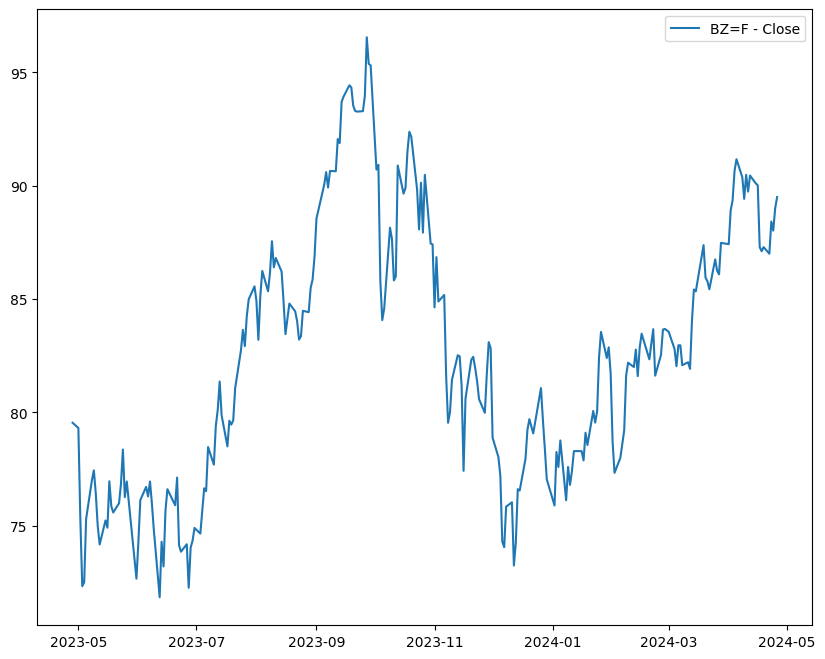

In [15]:
plt.figure(figsize = (10,8))
plt.plot(df['Date'], df['Close'], label='BZ=F - Close')

plt.legend(loc='best')
plt.show()

In [16]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-28,78.309998,79.599998,77.970001,79.540001,79.540001,26788
1,2023-05-01,80.180000,80.190002,78.129997,79.309998,79.309998,12551
2,2023-05-02,79.260002,79.779999,75.089996,75.320000,75.320000,35700
3,2023-05-03,75.269997,75.550003,71.680000,72.330002,72.330002,34878
4,2023-05-04,71.889999,73.730003,68.199997,72.500000,72.500000,30132


#Aplicando LSTM (Long short-term memory)

LSTM é uma sigla para **Memória de Longo Prazo e Curto Prazo**. É uma arquitetura de rede neural recorrente que é capaz de processar informações sequenciais ¹²³. A LSTM é capaz de capturar tanto o longo quanto o curto prazo, minimizando o efeito da utilização somente do curtíssimo prazo como acontece na arquitetura de uma RNN tradicional ¹. A LSTM é composta por unidades de memória que permitem que a rede aprenda a armazenar e acessar informações relevantes por longos períodos de tempo ⁴. A arquitetura de uma LSTM é mais robusta do que a de uma RNN convencional, pois há muito mais fluxo de informações circulando ¹.

Origem: conversa com o Bing, 13/01/2024
(1) O que é e como funciona uma LSTM passo-a-passo. https://didatica.tech/lstm-long-short-term-memory/.
(2) Long Short Term Memory: redes neurais artificiais que são capazes de .... https://ateliware.com/blog/long-short-term-memory/.
(3) LSTM em Deep Learning: Modelos de Memória de Longo Prazo. https://awari.com.br/lstm-em-deep-learning-modelos-de-memoria-de-longo-prazo/.
(4) O que é Long Short-Term Memory (LSTM)? - Guia de Hospedagem. https://guiadehospedagem.com.br/glossario/o-que-e-long-short-term-memory-lstm/.
(5) undefined. https://colah.github.io/posts/2015-08-Understanding-LSTMs/.

In [17]:
df_lstm = df


In [18]:
df_lstm.drop(columns=['Open', 'High', 'Low', 'Volume', 'Adj Close'], inplace=True)

df_lstm.head()

,Date,Close
0,2023-04-28,79.540001
1,2023-05-01,79.309998
2,2023-05-02,75.320000
3,2023-05-03,72.330002
4,2023-05-04,72.500000


In [19]:
close_data = df_lstm['Close'].values
close_data = close_data.reshape(-1,1) #transformar em array

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))  #Normalizando os dados
scaler = scaler.fit(close_data)
close_data = scaler.transform(close_data)

In [21]:
split_percent = 0.80  #Separação da base de treino e teste:
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df_lstm['Date'][:split]
date_test = df_lstm['Date'][split:]

print(len(close_train))
print(len(close_test))

201
51


In [22]:
# Gerar sequências temporais para treinamento e teste em um modelo de aprendizado de máquina

look_back = 10

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [23]:
from tensorflow.keras.metrics import MeanSquaredError

np.random.seed(7)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(look_back,1)))
model.add(Dense(1)),

model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])

num_epochs = 20
model.fit(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/20
10/10 [==============================] - 2s 8ms/step - loss: 0.1595 - mean_squared_error: 0.1595
Epoch 2/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 5/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 6/20
10/10 [==============================] - 0s 7ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 7/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 8/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 9/20
10/10 [==============================] - 0s 8ms/step - loss: 0.0124 - mean_squared_error: 0.0124
Epoch 10/20
10/10 [=========

In [24]:
# Avaliando o modelo nos dados de teste
mse = model.evaluate(test_generator, verbose=1)
print("Erro Quadrático Médio", mse[0])

41/41 [==============================] - 0s 3ms/step - loss: 0.0051 - mean_squared_error: 0.0051
Erro Quadrático Médio 0.005130111239850521


In [25]:
# 1. Fazer previsões usando o conjunto de teste
test_predictions = model.predict(test_generator)

# 2. Inverter qualquer transformação aplicada aos dados
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))
test_actuals_inv = scaler.inverse_transform(np.array(close_test).reshape(-1, 1))

# Ajuste as dimensões
test_actuals_inv = test_actuals_inv[:len(test_predictions_inv)]

# Calcular o MAPE
mape = np.mean(np.abs((test_actuals_inv - test_predictions_inv) / test_actuals_inv)) * 100

# Imprimir o MAPE
print(f'MAPE: {mape:.4f}')


41/41 [==============================] - 0s 3ms/step
MAPE: 1.6874


In [26]:
#O RMSE é a raiz quadrada do MSE (Mean Squared Error), que é a média dos quadrados das diferenças entre as previsões do modelo e os valores reais.
rmse_value = np.sqrt(mse[0])

print("RMSE:", rmse_value)

RMSE: 0.07162479486777272


O RMSE fornece uma métrica de erro na mesma unidade que a variável alvo (nesse caso, o preço de fechamento). Portanto significa que, em média, as previsões do modelo estão desviando em torno de 0.025 unidades da variável de destino. Quanto menor o RMSE, melhor é o desempenho do modelo em termos de previsões de regressão.

In [27]:
prediction = model.predict(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Predições da BZ=F",
    xaxis = {'title' : "Data"},
    yaxis = {'title' : "Fechamento"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

41/41 [==============================] - 0s 3ms/step


In [ ]:
# Validando com suavização da série temporal para melhorar resultado

In [28]:
df_lstm = df

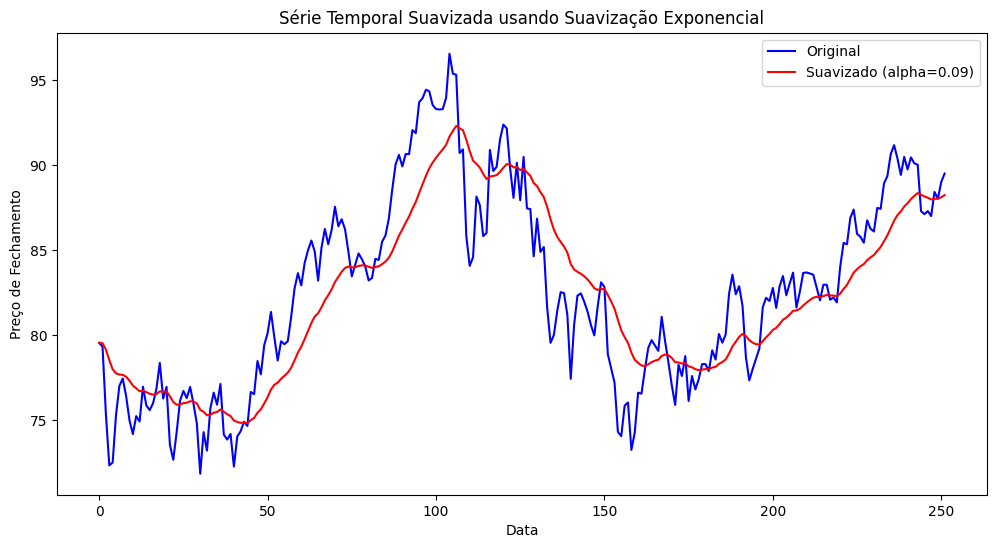

In [29]:
# Suazivando a série temporal
# Aplicando suavização exponencial
alpha = 0.09   # Fator de suavização
# O parâmetro alpha na suavização exponencial controla a taxa de decaimento dos pesos atribuídos às observações passadas.
# Determina o quão rapidamente o impacto das observações antigas diminui à medida que você avança no tempo.

df_lstm['Smoothed_Close'] = df_lstm['Close'].ewm(alpha=alpha, adjust=False).mean()

# Visualizando os resultados
plt.figure(figsize=(12, 6))
plt.plot(df.index, df_lstm['Close'], label='Original', color='blue')
plt.plot(df.index, df_lstm['Smoothed_Close'], label=f'Suavizado (alpha={alpha})', color='red')
plt.title('Série Temporal Suavizada usando Suavização Exponencial')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

In [30]:
# Teste de estacionariedade (ADF Test)
adf_result = adfuller(df_lstm['Smoothed_Close'] )
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print('Resultados do Teste de Estacionariedade:')
print('--------------------------------------')
print('Teste Estatístico:', adf_result[0])
print('Valor-p:', adf_result[1])
print('Valores Críticos:')
for key, value in adf_result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.4280166144167725
p-value: 0.5687733664101701
Resultados do Teste de Estacionariedade:
--------------------------------------
Teste Estatístico: -1.4280166144167725
Valor-p: 0.5687733664101701
Valores Críticos:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544


In [31]:
df_lstm

,Date,Close,Smoothed_Close
0,2023-04-28,79.540001,79.540001
1,2023-05-01,79.309998,79.519301
2,2023-05-02,75.320000,79.141364
3,2023-05-03,72.330002,78.528341
4,2023-05-04,72.500000,77.985790
...,...,...,...
247,2024-04-22,87.000000,87.978911
248,2024-04-23,88.419998,88.018609
249,2024-04-24,88.019997,88.018734
250,2024-04-25,89.010002,88.107948


In [32]:
df_lstm.drop(columns=['Close'], inplace=True)

df_lstm.head()

,Date,Smoothed_Close
0,2023-04-28,79.540001
1,2023-05-01,79.519301
2,2023-05-02,79.141364
3,2023-05-03,78.528341
4,2023-05-04,77.985790


In [33]:
close_data = df_lstm['Smoothed_Close'].values
close_data = close_data.reshape(-1,1) #transformar em array

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(close_data)
close_data = scaler.transform(close_data)

In [34]:
close_data

array([[2.69818565e-01],
       [2.68634494e-01],
       [2.47016237e-01],
       [2.11950931e-01],
       [1.80916665e-01],
       [1.67090068e-01],
       [1.63311045e-01],
       [1.62085802e-01],
       [1.55668334e-01],
       [1.42466709e-01],
       [1.26283275e-01],
       [1.17013321e-01],
       [1.06930285e-01],
       [1.08308223e-01],
       [1.03899288e-01],
       [9.84457063e-02],
       [9.55936315e-02],
       [9.73740873e-02],
       [1.06819377e-01],
       [1.04603670e-01],
       [1.06139512e-01],
       [8.99822614e-02],
       [7.07488835e-02],
       [6.15863432e-02],
       [6.27723364e-02],
       [6.68374751e-02],
       [6.83745751e-02],
       [7.31710359e-02],
       [7.24392458e-02],
       [6.57500950e-02],
       [4.44761644e-02],
       [3.77296604e-02],
       [2.59789350e-02],
       [2.80014916e-02],
       [3.46812081e-02],
       [3.71046315e-02],
       [4.55905874e-02],
       [3.79715684e-02],
       [2.95453187e-02],
       [2.35763010e-02],


In [35]:
plit_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df_lstm['Date'][:split]
date_test = df_lstm['Date'][split:]

print(len(close_train))
print(len(close_test))

201
51


In [36]:
# Gerar sequências temporais para treinamento e teste em um modelo de aprendizado de máquina

look_back = 5

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)

In [37]:
np.random.seed(7)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(look_back,1)))
model.add(Dense(1)),

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=[MeanSquaredError()])

num_epochs = 100
model.fit(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 5ms/step - loss: 0.1971 - mean_squared_error: 0.1971
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1417 - mean_squared_error: 0.1417
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0912 - mean_squared_error: 0.0912
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0077 - mean_squared_error: 0.0077
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0042 - mean_squared_error: 0.0042
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Epoch 10/100
10/10 

In [39]:
# 1. Fazer previsões usando o conjunto de teste
test_predictions = model.predict(test_generator)

# 2. Inverter qualquer transformação aplicada aos dados
test_predictions_inv = scaler.inverse_transform(test_predictions.reshape(-1, 1))
test_actuals_inv = scaler.inverse_transform(np.array(close_test).reshape(-1, 1))

# Ajuste as dimensões
test_actuals_inv = test_actuals_inv[:len(test_predictions_inv)]

# Calcular o MAPE
mape = np.mean(np.abs((test_actuals_inv - test_predictions_inv) / test_actuals_inv)) * 100

# Imprimir o MAPE
print(f"MAPE: {mape:.2f}%")

46/46 [==============================] - 0s 2ms/step
MAPE: 0.52%


In [40]:
# Avaliando o modelo nos dados de teste
mse = model.evaluate(test_generator, verbose=1)
print("Erro Quadrático Médio:", mse[0])

46/46 [==============================] - 0s 3ms/step - loss: 8.5307e-04 - mean_squared_error: 8.5307e-04
Erro Quadrático Médio: 0.00085306545952335


In [41]:
# O RMSE é a raiz quadrada do MSE (Mean Squared Error), que é a média dos quadrados das diferenças entre as previsões do modelo e os valores reais.
rmse_value = np.sqrt(mse[0])

print("RMSE:", rmse_value)

RMSE: 0.029207284357217294


In [42]:
prediction = model.predict(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Predições do BZ=F",
    xaxis = {'title' : "Data"},
    yaxis = {'title' : "Fechamento"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

46/46 [==============================] - 0s 2ms/step


Agora chegou o momento de prever o futuro!  Realizando o Forecasting!!

Vamos criar uma função para prever o futuro, vamos passar como parametro um número X de dias e a ideia dessa função é excutar o predict do modelo para nos retornar os dias futuros.

In [ ]:
close_data = close_data.reshape((-1))


# Função para prever os próximos 'num_prediction' pontos da série temporal
# Utiliza o modelo treinado para prever cada ponto sequencialmente
# A cada iteração, adiciona a previsão à lista 'prediction_list'

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]

    for _ in range(num_prediction):
        x = prediction_list[-look_back:]
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]

    return prediction_list

# Função para gerar as datas dos próximos 'num_prediction' dias
# Assume que o DataFrame 'df' possui uma coluna 'Date' contendo as datas

def predict_dates(num_prediction):
    last_date = df_lstm['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 15 #definição dos próximos dias
forecast = predict(num_prediction, model) #resultado de novos dias
forecast_dates = predict_dates(num_prediction)

1/1 [==============================] - 0s 23ms/step


In [ ]:
trace1 = go.Scatter(
    x = date_test,
    y = close_test,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = forecast_dates,
    y = forecast,
    mode = 'lines',
    name = 'Prediction'
)
layout = go.Layout(
    title = "Forecast BZ=F",
    xaxis = {'title' : "Data"},
    yaxis = {'title' : "Fechamento"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

In [ ]:
#Organizando os dados em um dataframe

In [ ]:
df = pd.DataFrame(df_lstm)
df_past = df[['Date','Smoothed_Close']]
df_past.rename(columns={'Smoothed_Close': 'Actual'}, inplace=True)         #criando nome das colunas
df_past['Date'] = pd.to_datetime(df_past['Date'])                          #configurando para datatime
df_past['Forecast'] = np.nan                                               #Preenchendo com NAs
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]
df_past.head(3)

,Date,Actual,Forecast
0,2023-12-26,81.070000,NaN
1,2023-12-27,80.942200,NaN
2,2023-12-28,80.712502,NaN


In [ ]:
# Faz a transformação inversa das predições
forecast = forecast.reshape(-1, 1) #reshape para array
forecast = scaler.inverse_transform(forecast)

In [ ]:
df_future = pd.DataFrame(columns=['Date', 'Actual', 'Forecast'])
df_future['Date'] = forecast_dates
df_future['Forecast'] = forecast.flatten()
df_future['Actual'] = np.nan
df_future.head()

,Date,Actual,Forecast
0,2024-04-30,NaN,88.213990
1,2024-05-01,NaN,89.854405
2,2024-05-02,NaN,90.496734
3,2024-05-03,NaN,91.341867
4,2024-05-04,NaN,92.344357


In [ ]:
# Concatenando os DataFrames usando concat
frames = [df_past, df_future]
results = pd.concat(frames, ignore_index=True).set_index('Date')
results.head()

,Actual,Forecast
Date,,
2023-12-26,81.070000,NaN
2023-12-27,80.942200,NaN
2023-12-28,80.712502,NaN
2023-12-29,80.381977,NaN
2024-01-02,79.977699,NaN


In [ ]:
results.tail()

,Actual,Forecast
Date,,
2024-05-11,NaN,115.685737
2024-05-12,NaN,127.299538
2024-05-13,NaN,147.398546
2024-05-14,NaN,185.640533
2024-05-15,NaN,264.019305


In [ ]:
results2023 =  results.loc['2024-05-02':] #mudar de acordo com a janela utilizada no começo e olhando os resultados acima

In [ ]:
plot_data = [
    go.Scatter(
        x=results2023.index,
        y=results2023['Actual'],
        name='actual'
    ),
    go.Scatter(
        x=results2023.index,
        y=results2023['Forecast'],
        name='prediction'
    )
]

plot_layout = go.Layout(
        title='Forecast BZ=F'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)

fig.show()

import plotly as ply
ply.offline.plot(fig)

'temp-plot.html'